CREATING A CSV FILE

In [7]:
!pip install -q mediapipe

import os
import cv2
import mediapipe as mp
import csv
import numpy as np

# --- Configuration ---
# 1. Path to your UNZIPPED image dataset
# !! THIS IS THE CORRECTED PATH based on your screenshot !!
DATA_DIR = "/kaggle/input/indian-sign-language-dataset/data"

# 2. Path for your NEW output CSV file
OUTPUT_CSV = "/kaggle/working/isl_landmarks.csv"
OUTPUT_DIR = "/kaggle/working/"

print(f"Reading from: {DATA_DIR}")
print(f"Will save to: {OUTPUT_CSV}")

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands

# --- Prepare the CSV file ---
# We need 1 column for the label, and 63 columns for the landmarks (21 * 3)
# (x, y, z for 21 landmarks)
header = ['label']
for i in range(21):
    header.extend([f'x{i}', f'y{i}', f'z{i}'])

# Open the CSV file to write to
with open(OUTPUT_CSV, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header) # Write the header row
    
    print("CSV file created. Starting landmark extraction...")
    
    # --- Iterate through each class folder (A, B, Hello, etc.) ---
    # We use os.walk to safely get the list of class directories
    try:
        class_folders = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
        if not class_folders:
            raise FileNotFoundError(f"No class folders found in {DATA_DIR}")
            
        print(f"Found {len(class_folders)} classes.")
        
        # Initialize MediaPipe once
        with mp_hands.Hands(
            static_image_mode=True,
            max_num_hands=1,
            min_detection_confidence=0.5) as hands:
            
            for label in sorted(class_folders):
                class_path = os.path.join(DATA_DIR, label)
                print(f"--- Processing class: {label} ---")
                
                # --- Iterate through each image in the class folder ---
                for img_name in os.listdir(class_path):
                    img_path = os.path.join(class_path, img_name)
                    
                    try:
                        # Read the image
                        img = cv2.imread(img_path)
                        if img is None:
                            print(f"Warning: Could not read image {img_name}")
                            continue
                        
                        # Convert BGR to RGB
                        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        
                        # Process the image
                        results = hands.process(img_rgb)
                        
                        # --- If a hand is found, extract landmarks ---
                        if results.multi_hand_landmarks:
                            # Get the first (and only) hand
                            hand_landmarks = results.multi_hand_landmarks[0]
                            
                            # Flatten the landmarks into a single list
                            landmarks = []
                            for lm in hand_landmarks.landmark:
                                landmarks.extend([lm.x, lm.y, lm.z])
                            
                            # Write the [label, x0, y0, z0, ...] row to the CSV
                            writer.writerow([label] + landmarks)
                            
                    except Exception as e:
                        print(f"Error processing {img_name}: {e}")

    except Exception as e:
        print(f"--- !! CRITICAL ERROR !! ---")
        print(f"Could not read data directory: {e}")
        print("Please check your DATA_DIR path.")

print("\n--- Landmark Extraction Complete! ---")
print(f"Your new dataset is saved at: {OUTPUT_CSV}")
print("You can now use this file as the input for Step 2.")

Reading from: /kaggle/input/indian-sign-language-dataset/data
Will save to: /kaggle/working/isl_landmarks.csv
CSV file created. Starting landmark extraction...
Found 35 classes.
--- Processing class: 1 ---


W0000 00:00:1763049309.700279     188 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1763049309.728435     188 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


--- Processing class: 2 ---
--- Processing class: 3 ---
--- Processing class: 4 ---
--- Processing class: 5 ---
--- Processing class: 6 ---
--- Processing class: 7 ---
--- Processing class: 8 ---
--- Processing class: 9 ---
--- Processing class: A ---
--- Processing class: B ---
--- Processing class: C ---
--- Processing class: D ---
--- Processing class: E ---
--- Processing class: F ---
--- Processing class: G ---
--- Processing class: H ---
--- Processing class: I ---
--- Processing class: J ---
--- Processing class: K ---
--- Processing class: L ---
--- Processing class: M ---
--- Processing class: N ---
--- Processing class: O ---
--- Processing class: P ---
--- Processing class: Q ---
--- Processing class: R ---
--- Processing class: S ---
--- Processing class: T ---
--- Processing class: U ---
--- Processing class: V ---
--- Processing class: W ---
--- Processing class: X ---
--- Processing class: Y ---
--- Processing class: Z ---

--- Landmark Extraction Complete! ---
Your new 

*Train the Neural Network*



the isl_landmarks.csv you just created to train your new, powerful MLP model.

Configuration set. Starting training...
Data loaded: 41143 samples, 35 classes.
Labels saved to /kaggle/working/MyLandmarkModel/landmark_labels.json
Scaler saved to /kaggle/working/MyLandmarkModel/landmark_scaler.pkl
Data split: 32914 train, 8229 test.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763050806.147102      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763050806.147912      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 35)             │         4,515 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,627 (307.14 KB)

 Trainable params: 78,627 (307.14 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training for 100 Epochs ---
Epoch 1/100


I0000 00:00:1763050808.971471     207 service.cc:148] XLA service 0x7f90180050e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763050808.972277     207 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763050808.972295     207 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763050809.260641     207 cuda_dnn.cc:529] Loaded cuDNN version 90300


  70/1029 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2533 - loss: 2.9526

I0000 00:00:1763050811.020789     207 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1029/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7925 - loss: 0.8046
Epoch 1: val_accuracy improved from -inf to 0.99903, saving model to /kaggle/working/MyLandmarkModel/best_landmark_model.h5


1029/1029 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7927 - loss: 0.8041 - val_accuracy: 0.9990 - val_loss: 0.0057
Epoch 2/100
1018/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9905 - loss: 0.0321
Epoch 2: val_accuracy improved from 0.99903 to 0.99951, saving model to /kaggle/working/MyLandmarkModel/best_landmark_model.h5


1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9905 - loss: 0.0321 - val_accuracy: 0.9995 - val_loss: 0.0047
Epoch 3/100
1014/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9948 - loss: 0.0182
Epoch 3: val_accuracy improved from 0.99951 to 0.99976, saving model to /kaggle/working/MyLandmarkModel/best_landmark_model.h5


1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9948 - loss: 0.0182 - val_accuracy: 0.9998 - val_loss: 0.0027
Epoch 4/100
1011/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9947 - loss: 0.0172
Epoch 4: val_accuracy did not improve from 0.99976
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.9998 - val_loss: 0.0028
Epoch 5/100
1017/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 0.0149
Epoch 5: val_accuracy did not improve from 0.99976
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 6/100
1012/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9969 - loss: 0.0102
Epoch 6: val_accuracy did not improve from 0.99976
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9969 - loss: 0.0103 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 7/100
1024/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9942 - loss: 0.0187
Epoch 7: val_ac

1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9987 - loss: 0.0048 - val_accuracy: 0.9999 - val_loss: 0.0026
Epoch 20/100
1024/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9974 - loss: 0.0095
Epoch 20: val_accuracy did not improve from 0.99988
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9974 - loss: 0.0095 - val_accuracy: 0.9998 - val_loss: 0.0030
Epoch 21/100
1025/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.0183
Epoch 21: val_accuracy did not improve from 0.99988
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9968 - loss: 0.0182 - val_accuracy: 0.9996 - val_loss: 0.0039
Epoch 22/100
1012/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9974 - loss: 0.0132
Epoch 22: val_accuracy did not improve from 0.99988
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9974 - loss: 0.0131 - val_accuracy: 0.9995 - val_loss: 0.0042
Epoch 23/100
1011/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9981 - loss: 0.0080
Epoch 23

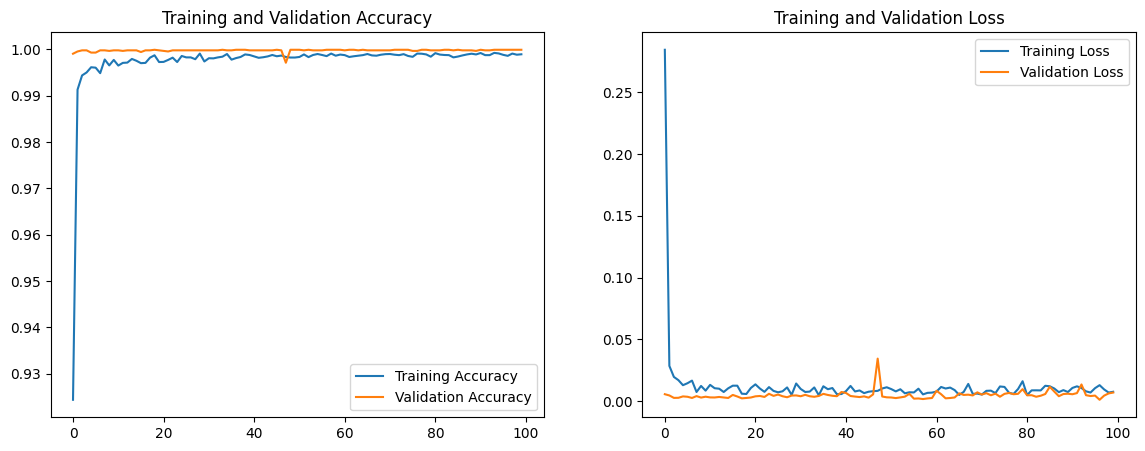


--- YOU ARE DONE WITH TRAINING! ---
Go to the 'Output' sidebar -> /kaggle/working/MyLandmarkModel
Download these 3 files:
1. best_landmark_model.h5
2. landmark_labels.json
3. landmark_scaler.pkl


In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os
import pickle
import json

# --- 1. Configuration ---
# This is the CSV file you created in Step 1
CSV_FILE_PATH = '/kaggle/working/isl_landmarks.csv' 
MODEL_SAVE_DIR = '/kaggle/working/MyLandmarkModel'
EPOCHS = 100

print("Configuration set. Starting training...")

# --- 2. Load and Prepare Data ---
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)
# --- FIX: Force the 'label' column to be read as a string ---
df = pd.read_csv(CSV_FILE_PATH, dtype={'label': str})

# Handle any rows with missing data (if any)
df = df.dropna()

X = df.drop('label', axis=1) # Features
y = df['label'] # Labels

print(f"Data loaded: {len(df)} samples, {len(y.unique())} classes.")

# --- 3. Preprocess Labels (Text to Numbers) ---
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Save the labels (e.g., ['A', 'B', 'Hello'])
labels_list = list(encoder.classes_)
labels_path = os.path.join(MODEL_SAVE_DIR, 'landmark_labels.json')
with open(labels_path, 'w') as f:
    json.dump(labels_list, f)
print(f"Labels saved to {labels_path}")

# --- 4. Preprocess Features (Scaling) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SAVE THE SCALER. This is critical for the app.
scaler_path = os.path.join(MODEL_SAVE_DIR, 'landmark_scaler.pkl')
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved to {scaler_path}")

# --- 5. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

print(f"Data split: {X_train.shape[0]} train, {X_test.shape[0]} test.")

# --- 6. Build the Neural Network (MLP) ---
INPUT_SHAPE = X_train.shape[1]  # Should be 63
NUM_CLASSES = y_train.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(INPUT_SHAPE,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --- 7. Train Model and Plot ---
checkpoint_path = os.path.join(MODEL_SAVE_DIR, "best_landmark_model.h5")
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path, save_weights_only=False,
    monitor='val_accuracy', mode='max', save_best_only=True, verbose=1
)

print(f"\n--- Starting Model Training for {EPOCHS} Epochs ---")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=[checkpoint_callback]
)

print("\n--- Training Complete ---")

# Plotting
def plot_training_history(history):
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    
    epochs_range = range(len(acc))
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)

print("\n--- YOU ARE DONE WITH TRAINING! ---")
print("Go to the 'Output' sidebar -> /kaggle/working/MyLandmarkModel")
print("Download these 3 files:")
print("1. best_landmark_model.h5")
print("2. landmark_labels.json")
print("3. landmark_scaler.pkl")